<a href="https://colab.research.google.com/github/ashikshafi08/cogito_ai/blob/main/Fastai_Cogitio_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upgrade Fastai and restart the runtime 
# !pip install fastai -q --upgrade  

     |████████████████████████████████| 188 kB 43.0 MB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 


In [ ]:
import fastai 
print(fastai.__version__)

2.5.1


In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os 
import random 
train_files = os.listdir('/content/drive/MyDrive/cogito_wav_img/train_images')
random_file = random.choice(train_files)

random_file


'neutral_29619.png'

In [ ]:
random_file.split('_')

['neutral', '13497.png']

In [ ]:
def label_func(f):
  return str(f).split('_')[0]

label_func(random_file)

'neutral'

In [ ]:
!unzip "/content/drive/Shareddrives/Tabata/cogito challenge /dbb3bd26ead211eb.zip"

In [ ]:
from fastai.vision.all import * 
from fastai import * 
import pandas as pd 
import numpy as np

In [ ]:
# Getting the dataframe 
train_df = pd.read_csv('/content/dataset/train.csv')
test_df = pd.read_csv('/content/dataset/test.csv')
submission_df = pd.read_csv('/content/dataset/sample_submission.csv')

In [ ]:
train_images_path = '/content/drive/MyDrive/cogito_wav_img/train_images/'
len(os.listdir(train_images_path))

5814

In [ ]:
items = get_image_files(train_images_path)

In [ ]:
from PIL import Image 
im = Image.open(train_images_path + random_file)
im.show()

In [ ]:
im.size

(321, 64)

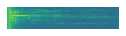

In [ ]:
show_image(im)

In [ ]:
# # Transforms 

# item_tfms = RandomResizedCrop(460, min_scale=0.75),
# batch_tfms = [*aug_transforms(size=224, max_warp=0 , max_zoom= 0.8 ), Normalize.from_stats(*imagenet_stats)]

In [ ]:
# Building a DataBlock 


audio = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   splitter=label_func)

audio.summary(train_images_path)

Setting-up type transforms pipelines
Found 5814 items
36 datasets of sizes 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


ValueError: ignored

In [ ]:
im = PILImage.create(items[0])
im.show()

In [ ]:
splits = RandomSplitter()

In [ ]:
dsrc = Datasets(items , 
                tfms = [[PILImage.create] , [label_func , Categorize] , 
                splits = splits)
dsrc

NameError: ignored

In [ ]:
train_df.shape
#train_df.drop(index = 18 , axis = 1 , inplace = True)

(5815, 2)

In [ ]:
train_df.head()

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral


In [ ]:
# drop_index = train_df[train_df['filename'] == '4894.mp3'].index[0]
# train_df.drop(index= drop_index , axis = 1 , inplace= True)
# train_df.shape

(5814, 2)

In [ ]:
train_df.drop(index = 18 , axis = 1 , inplace = True)

train_df['file_name_mod'] = train_df['filename'].apply(lambda x: x)

In [ ]:
path_label_list = []
for i, filename in enumerate(train_df['filename']):
  try: 
    trgt_folder = trgt_folder = '/content/drive/MyDrive/cogito_wav_img/train_images/' + train_df['emotion'][i] +'_' + train_df['filename'][i]
    path_label_list.append(trgt_folder)
  except KeyError:
    pass

len(path_label_list)
  

5812

In [ ]:
trgt_folder = '/content/drive/MyDrive/cogito_wav_img/train_images/' + train_df['emotion'][0] +'_' + train_df['filename'][0]

In [ ]:
trgt_folder

'/content/drive/MyDrive/cogito_wav_img/train_images/neutral_18777.mp3'

In [ ]:
train_df['full_path'] = path_label_list
train_df.head(10)

ValueError: ignored

In [ ]:
train_df.sort_values(by= ['filename'])

,filename,emotion
3939,0.mp3,neutral
1733,1.mp3,neutral
5148,100.mp3,neutral
3722,1005.mp3,joy
4743,1006.mp3,neutral
...,...,...
1270,988.mp3,neutral
5609,993.mp3,neutral
521,996.mp3,neutral
1503,997.mp3,neutral


In [ ]:
train_df.head(20)

,filename,emotion,new
0,18777.mp3,neutral,22032.mp3_joy
1,24041.mp3,neutral,22032.mp3_joy
2,1621.mp3,joy,22032.mp3_joy
3,28883.mp3,neutral,22032.mp3_joy
4,14918.mp3,neutral,22032.mp3_joy
5,25793.mp3,neutral,22032.mp3_joy
6,8382.mp3,joy,22032.mp3_joy
7,50666.wav,disgust,22032.mp3_joy
8,28471.mp3,surprise,22032.mp3_joy
9,1459.mp3,neutral,22032.mp3_joy


In [ ]:
for i , row in train_df[:20].iterrows():
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
19
20


In [ ]:
for i, filename in enumerate(train_df['filename']):
  train_df['new'] = train_df['filename'][i] + '_' +train_df['emotion'][i]
  

train_df.head(10) 

KeyError: ignored

In [ ]:
train_df['filename'][0] , train_df['emotion'][0]

('18777.mp3', 'neutral')

In [ ]:
train_df['filename'].apply(lambda x: noname(x))

0       None
1       None
2       None
3       None
4       None
        ... 
5811    None
5812    None
5813    None
5814    None
5815    None
Name: filename, Length: 5815, dtype: object

In [ ]:
len(os.listdir(train_images_path)) , train_df.shape[0]

(5814, 5815)